### Import the necessary packages

In [15]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

### Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Analysis

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

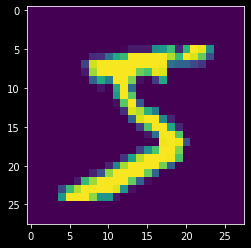

In [6]:
plt.imshow(X_train[0])

### Data Pre-Processing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2126 - accuracy: 0.9506 - val_loss: 0.1034 - val_accuracy: 0.9682
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0670 - accuracy: 0.9797 - val_loss: 0.0881 - val_accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 0.1156 - val_accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0914 - val_accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0267 - accuracy: 0.9920 - val_loss: 0.0862 - val_accuracy: 0.9802


### Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.08617018163204193, 0.9801999926567078]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 264ms/step
[[8.46943826e-13 1.57253368e-19 1.96990776e-14 3.01160138e-12
  1.78030464e-18 4.28635279e-16 1.02099006e-19 1.00000000e+00
  2.31007786e-13 1.16059251e-09]
 [3.43382928e-13 7.29512642e-13 1.00000000e+00 2.59724435e-18
  7.18828121e-19 4.43095160e-20 1.57180150e-12 2.10340672e-20
  9.12680796e-15 2.57497593e-20]
 [7.42934214e-10 9.99712765e-01 3.03818706e-06 6.55358634e-13
  1.32370133e-05 4.26156277e-10 6.16142026e-10 1.36882345e-05
  2.57250038e-04 1.04902729e-12]
 [9.99999762e-01 2.01685658e-18 1.22698598e-08 2.35469518e-14
  3.93878913e-13 1.61292490e-09 1.53220476e-08 1.24054740e-08
  5.34298192e-13 2.85961761e-07]]


In [16]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
